## Classifiers comparison: decision trees and k-nearest neighbors on the dataset Iris


In the following program we compare the prediction results obtained by decision trees and k-nearest neighbors on the dataset Iris

The following cell shows the program training a decision tree and its results in preciction 

In [6]:
from notebook.services.config import ConfigManager
cm = ConfigManager().update('notebook', {'limit_output': 10})

In [7]:
from sklearn import tree 
from sklearn.datasets import load_iris
from sklearn.model_selection import cross_val_score # will be used to separate training and test
iris = load_iris()
clf = tree.DecisionTreeClassifier(criterion="entropy",random_state=300,min_samples_leaf=5,class_weight={0:1,1:1,2:1})
clf = clf.fit(iris.data, iris.target)
scores = cross_val_score(clf, iris.data, iris.target, cv=5) # score will be the accuracy
print(scores)


[0.96666667 1.         0.86666667 0.86666667 1.        ]


The following cell shows the training of k-nearest neighbors and its prediction results.
Here we use a uniform weighting setting (weights='uniform'): any neighbors weights the same in the majority voting aggregation.

#### Classificazione knn con `weight='uniform'`

In [8]:
from sklearn import neighbors
n_neighbors = 11
clf_knn = neighbors.KNeighborsClassifier(n_neighbors, weights='uniform')
clf_knn = clf_knn.fit(iris.data, iris.target)
scores = cross_val_score(clf_knn, iris.data, iris.target, cv=5) # score will be the accuracy
print(scores)
# shows the model predictions  
for i in range(len(iris.target)):
    instance=(iris.data[i,:]).reshape(1, -1)
    predicted=clf_knn.predict(instance)[0]
    if iris.target[i]==predicted:
        pass
        #print(str(i)+" ok "+str(iris.target_names[iris.target[i]]))
    else:
        # Stampa errori
        print(
            "\x1b[31m Example: {} \t true class '{}' \t predicted '{}' \x1b[0m".format(
                str(i),
                str(iris.target_names[iris.target[i]]),
                str(iris.target_names[predicted]))
        )
        #print(str(i)+" nok "+"true class: "+str(iris.target_names[iris.target[i]])+"; predicted: "+str(iris.target_names[predicted]))

[0.93333333 1.         1.         0.96666667 1.        ]
 Example: 77 	 true class 'versicolor' 	 predicted 'virginica' 
 Example: 83 	 true class 'versicolor' 	 predicted 'virginica' 
 Example: 106 	 true class 'virginica' 	 predicted 'versicolor' 
 Example: 138 	 true class 'virginica' 	 predicted 'versicolor' 


In the following cell we use a varying weighting setting (weights='distance'): any neighbors weights inversely with its distance to the test instance in the majority voting aggregation.

#### Classificazione knn con `weight='distance'`

In [9]:
n_neighbors = 11
clf_knn2 = neighbors.KNeighborsClassifier(n_neighbors, weights='distance')
clf_knn2.fit(iris.data, iris.target)

print("Classification score of k-nn with distance weighting")
scores2 = cross_val_score(clf_knn2, iris.data, iris.target, cv=5,scoring='accuracy') # score will be the accuracy
print(scores2)

for i in range(len(iris.target)):
    instance=(iris.data[i,:]).reshape(1, -1)
    predicted2=clf_knn2.predict(instance)[0]
    if iris.target[i]==predicted2:
        pass
        #print(str(i)+" ok "+str(iris.target_names[iris.target[i]]))
    else:
        print(
            "\x1b[31m Example: {} \t true class '{}' \t predicted '{}' \x1b[0m".format(
                str(i),
                str(iris.target_names[iris.target[i]]),
                str(iris.target_names[predicted]))
        )
        #print(str(i)+" nok "+"true class: "+str(iris.target_names[iris.target[i]])+"; predicted: "+str(iris.target_names[predicted]))


Classification score of k-nn with distance weighting
[0.96666667 1.         1.         0.96666667 1.        ]


The following cell shows the tuning of the k-nn models with a varying value of k (number of nearest neighbors) and finds the best value of k (giving the maximum accuracy).

#### Determinamento del miglior valore di k (in base all'accuratezza)

In [1]:
import numpy as np
from numpy import zeros
from sklearn import neighbors
from sklearn.datasets import load_iris
iris = load_iris()
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.4, random_state=0)

best_accuracy=0
best_k=1
A=np.zeros(len(y_train), dtype=np.float) # for storing accuracies
print("k values \taccuracy weights=distance")
print("-"*30)
for n_neighbors in np.arange(1,len(y_train)+1):
    clf_knn3 = neighbors.KNeighborsClassifier(n_neighbors, weights='distance')
    # (n_neighbors=5, weights='uniform', algorithm='auto', leaf_size=30, p=2, metric='minkowski', metric_params=None, n_jobs=1, **kwargs)
    clf_knn3.fit(X_train, y_train)
    index=n_neighbors-1
    A[index]=clf_knn3.score(X_test, y_test)
    if best_accuracy<clf_knn3.score(X_test, y_test):
        best_accuracy=clf_knn3.score(X_test, y_test)
        best_k=n_neighbors
        print("\x1b[0;34mk {}\t\t{}\x1b[0m".format(str(n_neighbors), str(round(clf_knn3.score(X_test, y_test),4))))   
    else:
        print("k {}\t\t{}".format(str(n_neighbors), str(round(clf_knn3.score(X_test, y_test),4))))   
    #print("k neighbors="+str(n_neighbors))
    #print("accuracy="+str(clf_knn3.score(X_test, y_test)))

print("-"*30)
print("Best k = "+str(best_k))
print("Best accuracy = "+str(best_accuracy))

k values 	accuracy weights=distance
------------------------------
k 1		0.9167
k 2		0.9167
k 3		0.9333
k 4		0.9167
k 5		0.95
k 6		0.9333
k 7		0.9667
k 8		0.9333
k 9		0.9667
k 10		0.9667
k 11		0.9667
k 12		0.9667
k 13		0.9667
k 14		0.95
k 15		0.95
k 16		0.9167
k 17		0.9333
k 18		0.9167
k 19		0.9167
k 20		0.9167
k 21		0.9167
k 22		0.9167
k 23		0.9167
k 24		0.9
k 25		0.9167
k 26		0.9167
k 27		0.9333
k 28		0.9333
k 29		0.9333
k 30		0.9167
k 31		0.9333
k 32		0.9167
k 33		0.9333
k 34		0.9167
k 35		0.9333
k 36		0.9167
k 37		0.9333
k 38		0.9
k 39		0.9167
k 40		0.9167
k 41		0.9333
k 42		0.9333
k 43		0.9333
k 44		0.9167
k 45		0.9333
k 46		0.9167
k 47		0.9167
k 48		0.9167
k 49		0.9167
k 50		0.9167
k 51		0.9333
k 52		0.9333
k 53		0.9333
k 54		0.9333
k 55		0.9333
k 56		0.95
k 57		0.95
k 58		0.95
k 59		0.95
k 60		0.95
k 61		0.95
k 62		0.95
k 63		0.95
k 64		0.95
k 65		0.95
k 66		0.95
k 67		0.95
k 68		0.95
k 69		0.95
k 70		0.95
k 71		0.95
k 72		0.95
k 73		0.95
k 74		0.95
k 75		0.95
k 76		0.95
k 77		0.

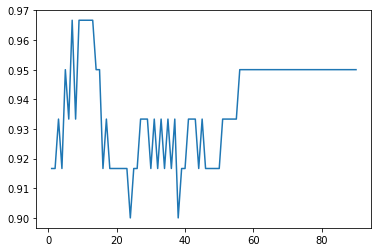

In [3]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

#plt.xticks(np.arange(1, len(y_train)+1, 8))
plt.yticks(np.arange(0.0,1.0,0.01))
plt.plot(np.arange(1,len(y_train)+1),A)
#plt.figure(figsize=(15, 15))
plt.show()

In the following cell we plot in the same plot two subplots with the diagrams on accuracy with the two kinds of weighting 
of the vote of the neighbours (uniform and with distance)

#### Confronto tra i due metodi

weighting = uniform
best k=7
best accuracy=0.9666666666666667
------------------------------
weighting = distance
best k=7
best accuracy=0.9666666666666667
------------------------------


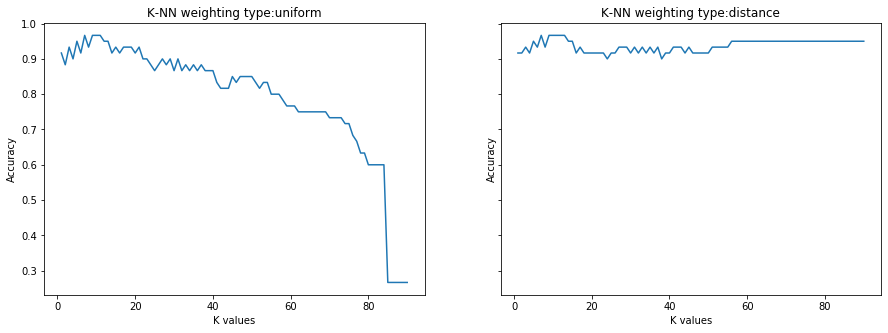

In [12]:
import numpy as np
from numpy import zeros
from sklearn import neighbors
from sklearn.datasets import load_iris
iris = load_iris()
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt

X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.4, random_state=0)

i=0  #parameter in the control of the subplot to draw on'
f,(ax1, ax2) = plt.subplots(1, 2, sharey=True)
f.set_figheight(5)
f.set_figwidth(15)
ax1.set_xlabel("K values")
ax1.set_ylabel("Accuracy")
ax2.set_xlabel("K values")
ax2.set_ylabel("Accuracy")
for weight_type in ['uniform','distance']:
    print("weighting = "+str(weight_type))
    A=np.zeros(len(y_train), dtype=np.float) # for storing accuracies
    best_accuracy=0
    best_k=1
    for n_neighbors in np.arange(1,len(y_train)+1):
        clf_knn2 = neighbors.KNeighborsClassifier(n_neighbors, weights=weight_type)
        # (n_neighbors=5, weights='uniform', algorithm='auto', leaf_size=30, p=2, metric='minkowski', metric_params=None, n_jobs=1, **kwargs)
        clf_knn2.fit(X_train, y_train)
        index=n_neighbors-1
        A[index]=clf_knn2.score(X_test, y_test)
        if best_accuracy<clf_knn2.score(X_test, y_test):
            best_accuracy=clf_knn2.score(X_test, y_test)
            best_k=n_neighbors
        #print("k neighbors="+str(n_neighbors))
        #print("accuracy="+str(clf_knn2.score(X_test, y_test)))
    
    print("best k="+str(best_k))
    print("best accuracy="+str(best_accuracy))
    print("-"*30)
    if i==0:
        ax1.plot(np.arange(1,len(y_train)+1),A)
        ax1.set_title('K-NN weighting type:'+str(weight_type))
    else:
        ax2.plot(np.arange(1,len(y_train)+1),A)
        ax2.set_title('K-NN weighting type:'+str(weight_type))
    i=i+1
    
plt.show()

In the following cell we plot (overlapping) in the same picture both the diagrams on accuracy with the two kinds of weighting 
of the vote of the neighbours (uniform and with distance)

#### Unione dei due grafici

weighting:uniform
best k=7
best accuracy=0.9666666666666667
------------------------------
weighting:distance
best k=7
best accuracy=0.9666666666666667
------------------------------


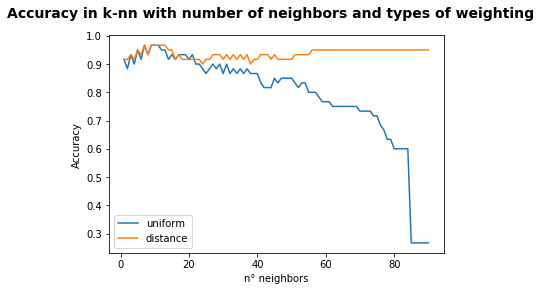

In [13]:
import numpy as np
from numpy import zeros
from sklearn import neighbors
from sklearn.datasets import load_iris
iris = load_iris()
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt

X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.4, random_state=0)

fig = plt.figure()
fig.suptitle('Accuracy in k-nn with number of neighbors and types of weighting', fontsize=14, fontweight='bold')
ax = fig.add_subplot(111)
ax.set_xlabel('n° neighbors')
ax.set_ylabel('Accuracy')

A=np.zeros((len(y_train),2), dtype=np.float) # 2 arrays for storing accuracies for each type of weigthing
i=0  #parameter in the control of the different diagram (=matrix A column index)
best_accuracy=0
for weight_type in ['uniform','distance']:
    print("weighting:"+str(weight_type))
    best_accuracy=0
    best_k=1
    for n_neighbors in np.arange(1,len(y_train)+1):
        clf_knn2 = neighbors.KNeighborsClassifier(n_neighbors, weights=weight_type)
        # (n_neighbors=5, weights='uniform', algorithm='auto', leaf_size=30, p=2, metric='minkowski', metric_params=None, n_jobs=1, **kwargs)
        clf_knn2.fit(X_train, y_train)
        index=n_neighbors-1 # computes the matrix row index
        A[index,i]=clf_knn2.score(X_test, y_test)
        if best_accuracy<clf_knn2.score(X_test, y_test):
            best_accuracy=clf_knn2.score(X_test, y_test)
            best_k=n_neighbors
        #print("k neighbors="+str(n_neighbors))
        #print("accuracy="+str(clf_knn2.score(X_test, y_test)))
    
    print("best k="+str(best_k))
    print("best accuracy="+str(best_accuracy))
    print("-"*30)
    plt.plot(np.arange(1,len(y_train)+1),A[:,i])
    i=i+1
plt.legend(['uniform', 'distance'], loc='lower left')  
plt.show()


Plot the Iris dataset, in 2-D, with a red color for Setosa, blu for Versicolor, Green for Virginica.


In [127]:
def plot_dataset(color):
    sepal = iris.data[:, 0:2]
    petals = iris.data[:,2:4]
    
    f, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(3, 2, sharey=True)
    f.set_figheight(16)
    f.set_figwidth(16)

    ax1.scatter(sepal[:,0], sepal[:,1], c=color)
    ax1.set_xlabel("Sepal length")
    ax1.set_ylabel("Sepal width")

    ax2.scatter(petals[:,0], petals[:,1], c=color)
    ax2.set_xlabel("Petals length")
    ax2.set_ylabel("Petals width")

    ax3.scatter(sepal[:,0], petals[:,0], c=color)
    ax3.set_xlabel("Sepal length")
    ax3.set_ylabel("Petals length")

    ax4.scatter(sepal[:,1], petals[:,1], c=color)
    ax4.set_xlabel("Sepal width")
    ax4.set_ylabel("Petals width")

    ax5.scatter(sepal[:,0], petals[:,1], c=color)
    ax5.set_xlabel("Sepal length")
    ax5.set_ylabel("Petals width")

    ax6.scatter(sepal[:,1], petals[:,0], c=color)
    ax6.set_xlabel("Sepal width")
    ax6.set_ylabel("Petals length")

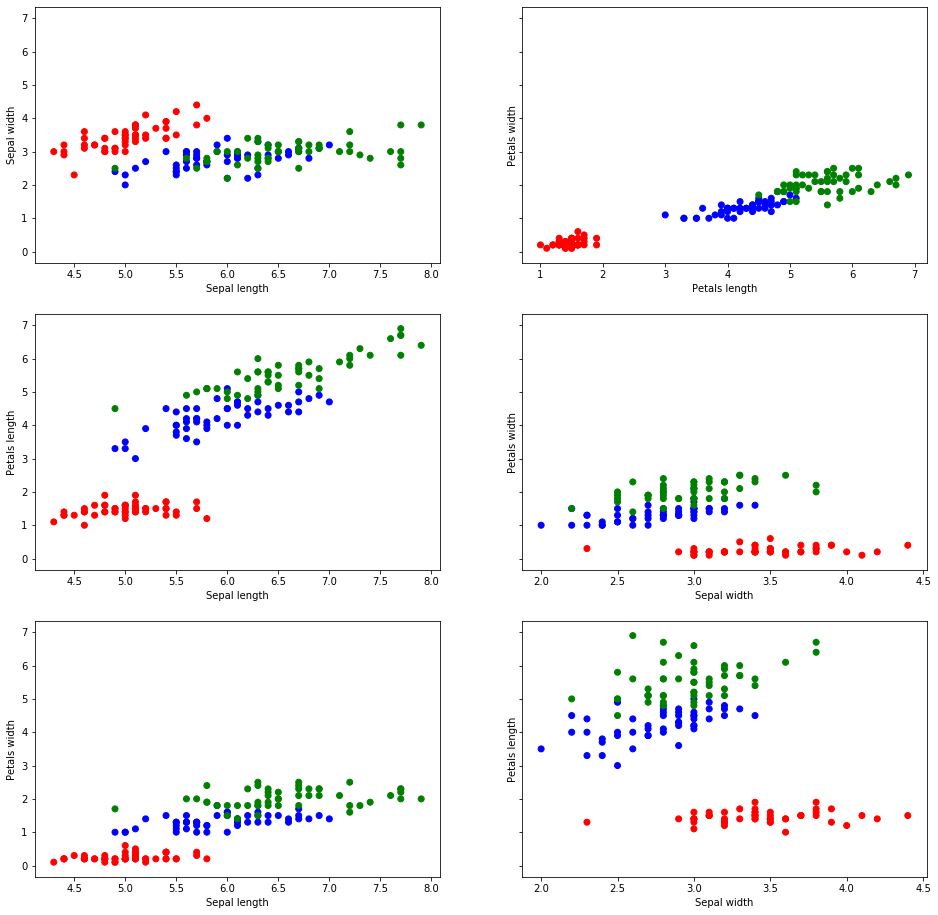

In [128]:
color = ['red' if t == 0 else 'blue' if t == 1 else 'green' for t in iris.target]
plot_dataset(color)

Plot the Iris dataset, in 2-D, with the color as above determined by the k-nn estimation


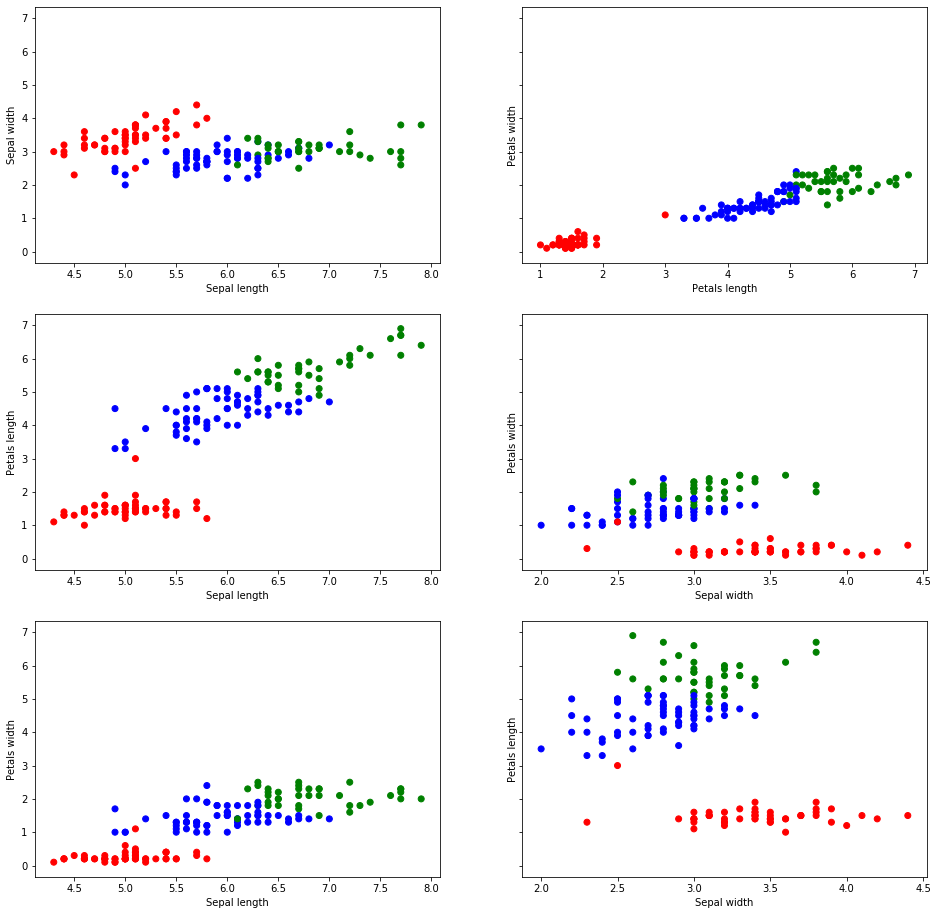

In [130]:
# Variare k (best k=7)
# Variare weight uniform/distance
clf_knn = neighbors.KNeighborsClassifier(90, weights='uniform').fit(iris.data, iris.target)

color = ['red' if t == 0 else 'blue' if t == 1 else 'green' for t in clf_knn.predict(iris.data)]

plot_dataset(color)

In the following, extend the above exercize on k-nn using a kernel function for the distances computation. Use a Gaussian kernel, centered around the data point, with a standard deviation sigma that must be tuned to the best value.

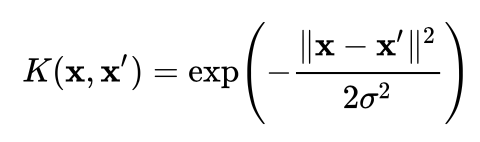

In [193]:
def gaussian(sigma):
    # dist array contenente le distanze euclidee tra ogni vicino ed il punto in esame
    def distance(dist):
        return np.exp(-(dist**2 / (2*(sigma**2))))
    return distance

#### Selezione del miglior parametro sigma

In [196]:
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.4, random_state=0)

best_sigma = 0
best_accuracy = 0
# testiamo diversi valori di sigma
for s in np.linspace(0.01, 10, 100): #linspace suddivide il range [0.01, 10] in 100 intervalli
    clf = neighbors.KNeighborsClassifier(
        n_neighbors = 7,
        weights = gaussian(s),
        metric = 'euclidean'
    ).fit(X_train, y_train)
    
    if best_accuracy<clf.score(X_test, y_test):
        best_accuracy=clf.score(X_test, y_test)
        best_sigma=s
        
    #print("sigma="+str(s))
    #print("accuracy="+str(clf.score(X_test, y_test)))
print("Best sigma = "+str(best_sigma))
print("Best accuracy = "+str(best_accuracy))

Best sigma = 0.6154545454545455
Best accuracy = 0.9666666666666667


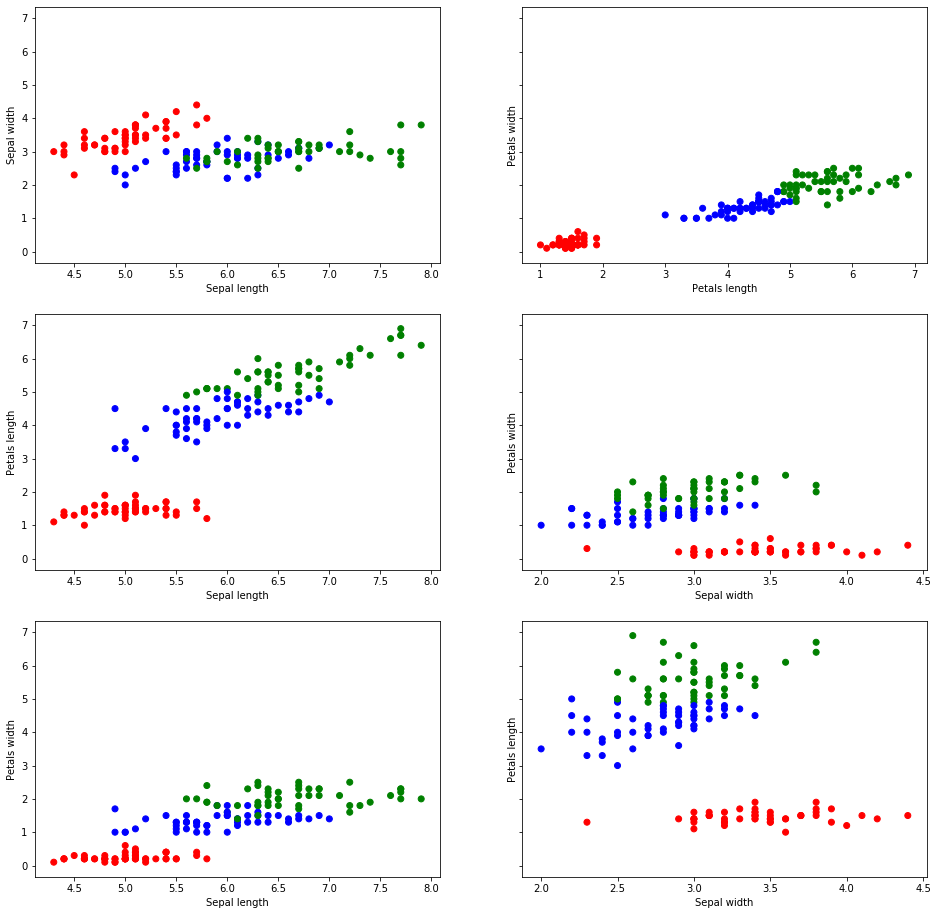

In [197]:
clf_g = neighbors.KNeighborsClassifier(90, weights=gaussian(best_sigma), metric="euclidean").fit(iris.data, iris.target)

color = ['red' if t == 0 else 'blue' if t == 1 else 'green' for t in clf_g.predict(iris.data)]
plot_dataset(color)